In [11]:
# Creating bias model

from enum import Enum

class SimplifiedBias(Enum):
    LEFT = 0
    UNBIASED = 1
    RIGHT = 2
    
    @staticmethod
    def get_simplified_bias_for_domain(domain):
        return bias_to_simplified_bias[Bias.get_bias_for_domain(domain)]
    

class Bias(Enum):
    EXTREME_LEFT = 0
    LEFT = 1
    LEFT_CENTER = 2
    LEAST_BIASED = 3
    RIGHT_CENTER = 4
    RIGHT = 5
    EXTREME_RIGHT = 6

    @staticmethod
    def get_bias_for_domain(domain):
        return bias_by_domain[domain]

bias_to_simplified_bias = {
    Bias.EXTREME_LEFT : SimplifiedBias.LEFT,
    Bias.LEFT : SimplifiedBias.LEFT,
    Bias.LEFT_CENTER : SimplifiedBias.UNBIASED,
    Bias.LEAST_BIASED : SimplifiedBias.UNBIASED,
    Bias.RIGHT_CENTER : SimplifiedBias.UNBIASED,
    Bias.RIGHT : SimplifiedBias.RIGHT,
    Bias.EXTREME_RIGHT : SimplifiedBias.RIGHT
}

bias_by_domain = {
    'dailykos.com': Bias.EXTREME_LEFT,
    'talkingpointsmemo.com': Bias.LEFT,
    'politicususa.com': Bias.LEFT,
    'thenation.com': Bias.LEFT,
    'motherjones.com': Bias.LEFT,
    'occupydemocrats.com': Bias.EXTREME_LEFT,
    'rawstory.com': Bias.LEFT,
    'propublica.org': Bias.LEFT_CENTER,
    'thenewcivilrightsmovement.com': Bias.LEFT,
    'mediamatters.org': Bias.LEFT,
    'slate.com': Bias.LEFT,
    'thinkprogress.org': Bias.LEFT,
    'oppositionreport.com': Bias.EXTREME_LEFT,
    'democracynow.org': Bias.LEFT,
    'washingtonpost.com/blogs/plum-line': Bias.LEFT_CENTER,
    '100percentfedup.com': Bias.EXTREME_RIGHT,
    'cnn.com': Bias.LEFT_CENTER,
    'bbc.com': Bias.LEFT_CENTER,
    'bloomberg.com': Bias.LEFT_CENTER,
    'nytimes.com': Bias.LEFT_CENTER,
    'forbes.com': Bias.RIGHT_CENTER,
    'abcnews.go.com': Bias.LEFT_CENTER,
    'wsj.com': Bias.RIGHT_CENTER,
    'latimes.com': Bias.LEFT_CENTER,
    'washingtonpost.com': Bias.LEFT_CENTER,
    'nydailynews.com': Bias.LEFT_CENTER,
    'sfchronicle.com': Bias.LEFT_CENTER,
    'nypost.com': Bias.RIGHT_CENTER,
    'chicagotribune.com': Bias.LEFT_CENTER,
    'nj.com': Bias.LEFT_CENTER,
    'chicago.suntimes.com': Bias.LEFT_CENTER,
    'chron.com': Bias.LEFT_CENTER,
    'dallasnews.com': Bias.RIGHT_CENTER,
    'seattletimes.com': Bias.LEFT_CENTER,
    'azcentral.com': Bias.RIGHT_CENTER,
    'c-span.org': Bias.LEAST_BIASED,
    'economist.com': Bias.LEAST_BIASED,
    'reuters.com': Bias.LEAST_BIASED,
    'ft.com': Bias.LEAST_BIASED,
    'apnews.com': Bias.LEAST_BIASED,
    'afp.com': Bias.LEAST_BIASED,
    'usatoday.com': Bias.LEAST_BIASED,
    'townhall.com': Bias.RIGHT,
    'dailycaller.com': Bias.RIGHT,
    'breitbart.com': Bias.RIGHT,
    'dailywire.com': Bias.RIGHT,
    'conservativetribune.com': Bias.EXTREME_RIGHT,
    'thefederalistpapers.org': Bias.EXTREME_RIGHT,
    'truthfeed.com': Bias.EXTREME_RIGHT,
    'www1.cbn.com': Bias.RIGHT,
    'ijr.com': Bias.RIGHT,
    'freedomdaily.com': Bias.EXTREME_RIGHT,
    'washingtonexaminer.com': Bias.RIGHT_CENTER,
    'allenbwest.com': Bias.RIGHT,
    'theblaze.com': Bias.RIGHT,
    'louderwithcrowder.com': Bias.RIGHT,
    'mrctv.org': Bias.RIGHT,
    'rightwingnews.com': Bias.EXTREME_RIGHT,
    'westernjournalism.com': Bias.RIGHT,
    'judicialwatch.org': Bias.RIGHT,
    'thegatewaypundit.com': Bias.EXTREME_RIGHT,
    'conservative101.com': Bias.EXTREME_RIGHT,
    'bizpacreview.com': Bias.RIGHT,
    'usherald.com': Bias.EXTREME_RIGHT,
    'redstate.com': Bias.RIGHT,
    'youngcons.com': Bias.RIGHT
}

# Logistic regression bias classifier

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/source/newsclust.csv")
df = df.query("site != 'cbn.com'")
df['bias'] = df.apply(lambda row: Bias.get_bias_for_domain(row['site']), axis=1)

df['simplified_bias'] = df.apply(lambda row: SimplifiedBias.get_simplified_bias_for_domain(row['site']), axis=1)

In [20]:
TEST_DOMAINS =  {
    'bloomberg.com',
     'breitbart.com',
     'bbc.com',
     'ijr.com',
     'wsj.com',
     'nypost.com',
     'talkingpointsmemo.com',
     'motherhones.com',
     'usatoday.com',
     'afp.com',
     'rightwingnews.com',
     'occupydemocrats.com'
}

In [21]:
df_train =  df.loc[~df['site'].isin(TEST_DOMAINS)]
df_test =  df.loc[df['site'].isin(TEST_DOMAINS)]

In [22]:
bias_type = 'bias'

X_train = df_train['text'].values
y_train = df_train[bias_type].apply(lambda b: b.value).values

X_test = df_test['text'].values
y_test = df_test[bias_type].apply(lambda b: b.value).values

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(BaseEstimator, TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [42]:
ratio = dict((i, 2000) for i in range(7))
print(ratio)

{0: 2000, 1: 2000, 2: 2000, 3: 2000, 4: 2000, 5: 2000, 6: 2000}


# Pipeline

In [36]:
from imblearn.pipeline import Pipeline


from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline

In [37]:

from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(BaseEstimator, TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [38]:
ratio = dict((i, 2000) for i in range(7))

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
#     ('vect', CountVectorizer()),
#     ('trans', TfidfTransformer()),
#     ('svd', TruncatedSVD(n_components=20)),
#     ('samp', RandomUnderSampler(ratio=ratio)),
    ('clf', LogisticRegression())
])

In [39]:
%time pipeline.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 3.43 s, total: 1min 53s
Wall time: 1min 56s


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [40]:
best_clf = pipeline
print(classification_report(df_test[bias_type].apply(lambda b: b.value).values, best_clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.69      0.01      0.01      2029
          1       0.19      0.32      0.23      1798
          2       0.25      0.61      0.35      3850
          3       0.19      0.09      0.12      3949
          4       0.10      0.02      0.03      3781
          5       0.39      0.55      0.45      3722
          6       0.31      0.12      0.17      1886

avg / total       0.28      0.27      0.21     21015



# Cross validation

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:

param_grid = {
#     'vect__ngram_range': ((1, 1), (1, 2)),
#     'vect__max_df': (0.5, 0.75),
#     'svd__n_components': [10, 20, 100],
    'clf__C': [.1, 1, 10, 100, 1000]
}

In [44]:
%%time
grid = GridSearchCV(pipeline, cv=3, n_jobs=6, param_grid=param_grid, verbose=10)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] clf__C=0.1 ......................................................
[CV] clf__C=0.1 ......................................................
[CV] clf__C=0.1 ......................................................
[CV] clf__C=1 ........................................................
[CV] clf__C=1 ........................................................
[CV] clf__C=1 ........................................................
[CV] ............. clf__C=0.1, score=0.6091983368589977, total= 3.9min


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  6.2min


[CV] clf__C=10 .......................................................
[CV] ............. clf__C=0.1, score=0.6379486431281004, total= 4.3min
[CV] clf__C=10 .......................................................
[CV] ............. clf__C=0.1, score=0.6179549848611973, total= 4.5min
[CV] clf__C=10 .......................................................
[CV] ............... clf__C=1, score=0.7606681741921365, total= 5.7min
[CV] ............... clf__C=1, score=0.7628027429238401, total= 5.9min
[CV] clf__C=100 ......................................................
[CV] ............... clf__C=1, score=0.7566483055484624, total= 5.7min


[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:  9.5min remaining: 14.3min


[CV] clf__C=100 ......................................................
[CV] clf__C=100 ......................................................
[CV] .............. clf__C=10, score=0.8029032022758772, total= 8.6min
[CV] .............. clf__C=10, score=0.7976364166909834, total= 8.2min
[CV] clf__C=1000 .....................................................


[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed: 17.6min remaining: 15.4min


[CV] .............. clf__C=10, score=0.7909750848137744, total= 8.1min
[CV] clf__C=1000 .....................................................
[CV] clf__C=1000 .....................................................
[CV] ............. clf__C=100, score=0.7987818221606244, total=10.3min
[CV] ............... clf__C=100, score=0.79336883571637, total= 9.9min


[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed: 21.8min remaining: 10.9min


[CV] ............. clf__C=100, score=0.7865975996789845, total= 9.6min


[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed: 21.8min remaining:  5.4min


[CV] ............ clf__C=1000, score=0.7919979575461376, total= 7.4min
[CV] ............ clf__C=1000, score=0.7818553241162952, total= 7.2min
[CV] ............ clf__C=1000, score=0.7884082287715203, total= 7.6min


[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed: 26.2min finished


CPU times: user 2min 35s, sys: 39.1 s, total: 3min 14s
Wall time: 28min 43s


In [45]:
best_clf = grid.best_estimator_
print(classification_report(df_test[bias_type].apply(lambda b: b.value).values, best_clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.72      0.05      0.10      2029
          1       0.20      0.32      0.24      1798
          2       0.25      0.57      0.35      3850
          3       0.25      0.12      0.17      3949
          4       0.16      0.05      0.08      3781
          5       0.37      0.50      0.43      3722
          6       0.28      0.19      0.23      1886

avg / total       0.30      0.27      0.24     21015



# Visualization

In [47]:
if bias_type == 'bias':
    bias = [Bias(v) for v in best_clf.predict(X_test)]
    cols = ['Bias.EXTREME_LEFT', 'Bias.LEFT', 'Bias.LEFT_CENTER', 'Bias.LEAST_BIASED', 'Bias.RIGHT_CENTER', 'Bias.RIGHT', 'Bias.EXTREME_RIGHT']
    ticks = ['EXT_LEFT', 'LEFT', 'LEFT_CENTER', 'UNBIASED', 'RIGHT_CENTER', 'RIGHT', 'EXTREME_RIGHT']
    k = 7
elif bias_type == 'simplified_bias':
    bias = [SimplifiedBias(v) for v in best_clf.predict(X_test)]
    cols = ['SimplifiedBias.LEFT', 'SimplifiedBias.UNBIASED', 'SimplifiedBias.RIGHT']
    ticks = ['LEFT', 'UNBIASED', 'RIGHT']
    k = 3
else:
    raise ValueError

df_test = df_test.assign(pred=pd.Series(bias).values)

In [48]:
dfc = df_test.copy()
dfc['bias'] = dfc['bias'].astype(str)
dfc['pred'] = dfc['pred'].astype(str)
r = dfc.groupby(['site', 'pred']).apply(lambda g: len(g)).unstack().fillna(0)[cols]

r = (r - r.mean(axis=0)) / np.sqrt(r.var(axis=0)) + (0 - ((r - r.mean(axis=0)) / np.sqrt(r.var(axis=0))).min())
r = r / np.repeat(r.sum(axis=1).values[:, None], k, axis=1)
r

pred,Bias.EXTREME_LEFT,Bias.LEFT,Bias.LEFT_CENTER,Bias.LEAST_BIASED,Bias.RIGHT_CENTER,Bias.RIGHT,Bias.EXTREME_RIGHT
site,,,,,,,
afp.com,0.000000,0.140996,0.377639,0.381988,0.078670,0.020707,0.000000
bbc.com,0.006864,0.000000,0.497198,0.462039,0.016015,0.001061,0.016822
bloomberg.com,0.011403,0.012671,0.364231,0.438920,0.145300,0.024680,0.002795
breitbart.com,0.011974,0.158956,0.145208,0.073999,0.018266,0.321632,0.269965
ijr.com,0.075453,0.234206,0.083079,0.000000,0.005208,0.435634,0.166420
nypost.com,0.006844,0.071238,0.530147,0.023905,0.099482,0.186205,0.082179
occupydemocrats.com,0.324849,0.306152,0.000000,0.003777,0.000000,0.128690,0.236533
rightwingnews.com,0.040183,0.089298,0.031954,0.003374,0.013522,0.400685,0.420984
talkingpointsmemo.com,0.068527,0.389097,0.312927,0.025946,0.032423,0.061157,0.109923


In [51]:

def viz(domain):
    plt.figure(figsize=(15, 2))
    plt.stem(r.loc[domain, :])
    plt.xticks(range(k), ticks, rotation=45)
    plt.title(domain, size=18)
    plt.show()

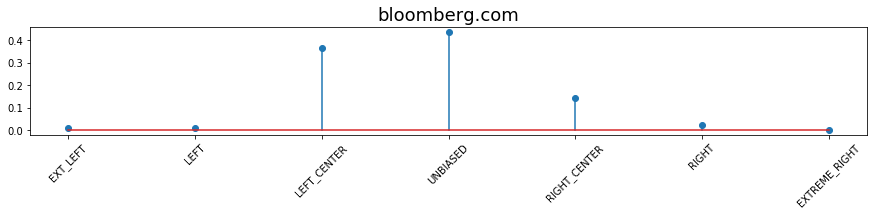

In [52]:
viz('bloomberg.com')

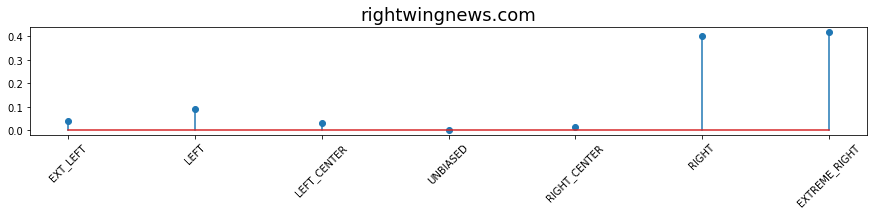

In [53]:
viz('rightwingnews.com')

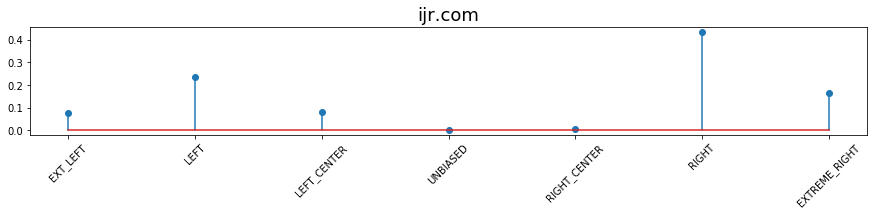

In [54]:
viz('ijr.com')